In [1]:
import numpy as np
import pandas as pd

In [2]:
survey_file = "/home/ashish/Documents/github/VA/data/COPD Study.csv"

In [3]:
data = pd.read_csv(survey_file)
data.head()

,Timestamp,Subject Number,Age,Sex,Height,Weight,Unnamed: 6,How tired do you feel overall?,How physically fatigued do you feel?,Do you feel mentally fatigued?,...,Do you feel mentally fatigued?.3,Do you feel sleepy or drowsy?.3,Do you feel active and energetic? .3,How difficult was the task?.2,How tired do you feel overall?.4,How physically fatigued do you feel?.4,Do you feel mentally fatigued?.4,Do you feel sleepy or drowsy?.4,Do you feel active and energetic? .4,How difficult was the task?.3
0,2020/12/17 12:09:59 PM EST,2,35,Female,5.4,150.0,Accept,1,1,1,...,3,1,10,2,2,1,1,1,10,1
1,2020/12/17 4:10:38 PM EST,1,29,Male,6,205.0,Accept,3,4,4,...,7,8,3,6,8,5,7,8,2,4
2,2021/01/14 2:29:32 PM EST,4,28,Male,5.10,228.0,Accept,4,4,3,...,3,7,4,3,5,5,5,7,3,1
3,2021/01/14 5:53:58 PM EST,3,30,Male,6.2,234.0,Accept,6,8,6,...,10,10,2,5,9,3,10,10,3,1
4,2021/01/26 1:58:50 PM EST,6,25,Male,"5'11""",165.0,Accept,3,3,2,...,8,8,7,7,8,5,8,8,5,3


In [4]:
data.columns

Index(['Timestamp', 'Subject Number', 'Age', 'Sex', 'Height', 'Weight',
       'Unnamed: 6', 'How tired do you feel overall?',
       'How physically fatigued do you feel?',
       'Do you feel mentally fatigued?', 'Do you feel sleepy or drowsy?',
       'Do you feel active and energetic? ',
       'Do you have difficulty breathing right now?',
       'How tired do you feel overall?.1',
       'How physically fatigued do you feel?.1',
       'Do you feel mentally fatigued?.1', 'Do you feel sleepy or drowsy?.1',
       'Do you feel active and energetic? .1', 'How difficult was the task?',
       'How tired do you feel overall?.2',
       'How physically fatigued do you feel?.2',
       'Do you feel mentally fatigued?.2', 'Do you feel sleepy or drowsy?.2',
       'Do you feel active and energetic? .2',
       'Do you have difficulty breathing right now?.1',
       'How difficult was the task?.1', 'How tired do you feel overall?.3',
       'How physically fatigued do you feel?.3',
       

- **From the above columns, we can see that the survey was taken for four different rounds before and after inducing fatigue to the subject**

In [5]:
round_idx = {0: [], 1: [], 2: [], 3: [], 4: []}
for i, col in enumerate(data.columns):
    zero_flag = True
    for idx in range(1, 5):
        if f'.{idx}' in col:
            round_idx[idx].append(i)
            zero_flag = False
            
    if zero_flag and i > 6:
        round_idx[0].append(i)
            
round_idx

{0: [7, 8, 9, 10, 11, 12, 18],
 1: [13, 14, 15, 16, 17, 24, 25],
 2: [19, 20, 21, 22, 23, 31],
 3: [26, 27, 28, 29, 30, 37],
 4: [32, 33, 34, 35, 36]}

In [6]:
blocks = []
for i in range(5):
    blocks.append(data.iloc[:, [1] + round_idx[i]])

In [7]:
blocks[4]

,Subject Number,How tired do you feel overall?.4,How physically fatigued do you feel?.4,Do you feel mentally fatigued?.4,Do you feel sleepy or drowsy?.4,Do you feel active and energetic? .4
0,2,2,1,1,1,10
1,1,8,5,7,8,2
2,4,5,5,5,7,3
3,3,9,3,10,10,3
4,6,8,5,8,8,5
5,5,2,2,2,6,10
6,7,2,2,4,1,6
7,2,4,4,5,6,3
8,8,8,8,7,8,3
9,9,8,2,7,8,2


#### Change scale (1-10) to range (1-5) explaining [NoFatigue, SomeFatigue, ExtremeFatigue]

In [8]:
for i in range(5):
    block_i = blocks[i].drop(columns=["Subject Number"])
    columns = block_i.columns
    conditions = [block_i.values < 4, block_i.values > 6]
    choices = ["None", "Extreme"]

    blocks[i] = pd.DataFrame(np.select(conditions, choices, default="Moderate"), index=block_i.index, columns=columns)

In [9]:
blocks[0]

,How tired do you feel overall?,How physically fatigued do you feel?,Do you feel mentally fatigued?,Do you feel sleepy or drowsy?,Do you feel active and energetic?,Do you have difficulty breathing right now?,How difficult was the task?
0,None,None,None,None,Extreme,None,None
1,None,Moderate,Moderate,Moderate,Moderate,None,None
2,Moderate,Moderate,None,None,Moderate,None,None
3,Moderate,Extreme,Moderate,Extreme,None,None,None
4,None,None,None,None,None,None,None
5,None,None,None,None,Extreme,None,None
6,None,None,None,None,Moderate,None,None
7,Moderate,Moderate,Moderate,Moderate,Moderate,None,None
8,None,None,Moderate,None,Extreme,None,None
9,Moderate,Moderate,None,None,Moderate,None,None


In [12]:
scale = ["None", "Moderate", "Extreme"]

In [13]:
import plot_likert

<AxesSubplot:xlabel='Percentage of Responses'>

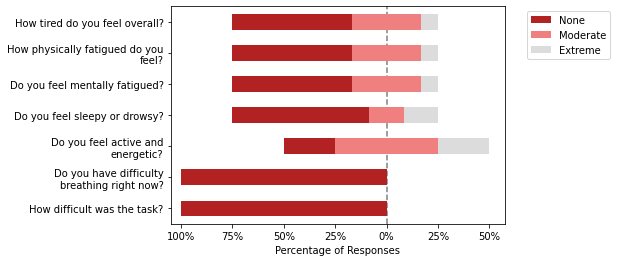

In [14]:
plot_likert.plot_likert(blocks[0], scale, plot_percentage=True)

<AxesSubplot:xlabel='Percentage of Responses'>

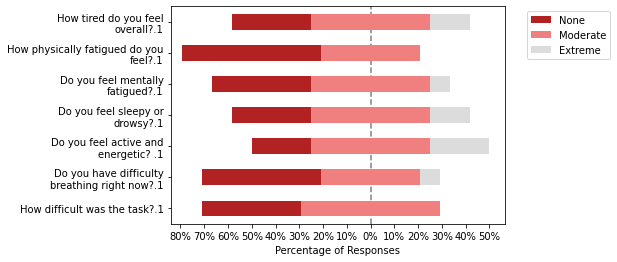

In [15]:
plot_likert.plot_likert(blocks[1], scale, plot_percentage=True)

<AxesSubplot:xlabel='Percentage of Responses'>

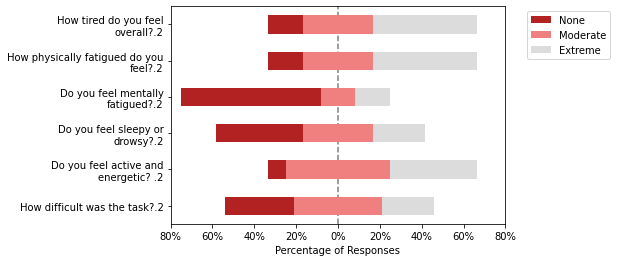

In [17]:
plot_likert.plot_likert(blocks[2], scale, plot_percentage=True)

<AxesSubplot:xlabel='Percentage of Responses'>

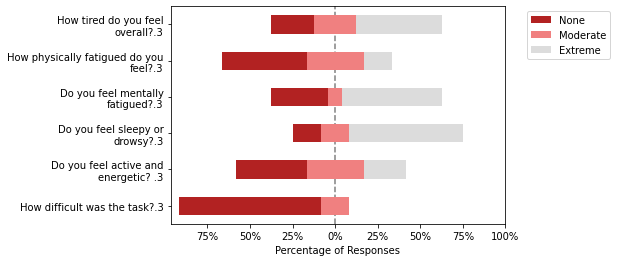

In [19]:
plot_likert.plot_likert(blocks[3], scale, plot_percentage=True)

<AxesSubplot:xlabel='Percentage of Responses'>

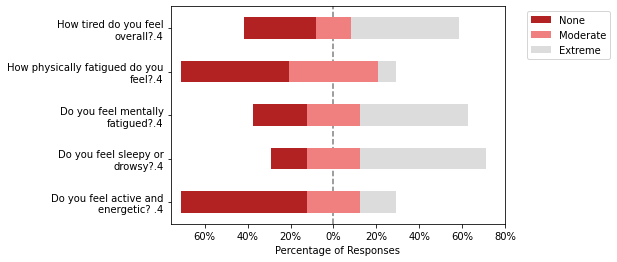

In [20]:
plot_likert.plot_likert(blocks[4], scale, plot_percentage=True)